# GAIA Clustering and Get ilabel
#### -------------------------------------------------------------------------
## Data importation from **.vot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
from sklearn.cluster import DBSCAN
from sklearn import cluster

import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
voname_list = ["NGC2682-4.0deg-0.2err.vot", "NGC2516-3.5deg-0.2err.vot", "NGC2516-6.0deg-0.2err.vot","NGC6811-1.0deg-0.2err.vot", "NGC1039-3.0deg-0.1err.vot",
               "NGC1647-4.0deg-0.2err.vot", "Collinder65-4.0deg-0.2err.vot", "NGC1647-3.0deg-0.1err.vot"]

voname  = voname_list[0]
weight  = [5,1,1,4,4,4,4,4]
WEIGHT  = [10.7, 6.5, 6.5, 4.1, 4.1, 2.1, 2.1, 2.1]

with open('ilabel_dbscan', 'rb') as fichier:
    my_depickler = pickle.Unpickler(fichier)
    file_result = my_depickler.load()

In [14]:
for name in file_result :
    print(name)

NGC2682
NGC2516
NGC6811
NGC1647


In [66]:
voname  = "NGC2516-6.0deg-0.01err.vot"
source2 = gu.source()
source2.read_votable(voname)
source2.convert_filter_data()
source2.convert_to_cartesian()
source2.set_weight(weight)
source2.normalization_normal()

## NGC2516-6.0deg-0.01err.vot read...
## Total stars: 11453
## Density star per pc^3: 0.00458

## Conversion done...
## Stars selected: 11390
## Normalization done on filtered data..


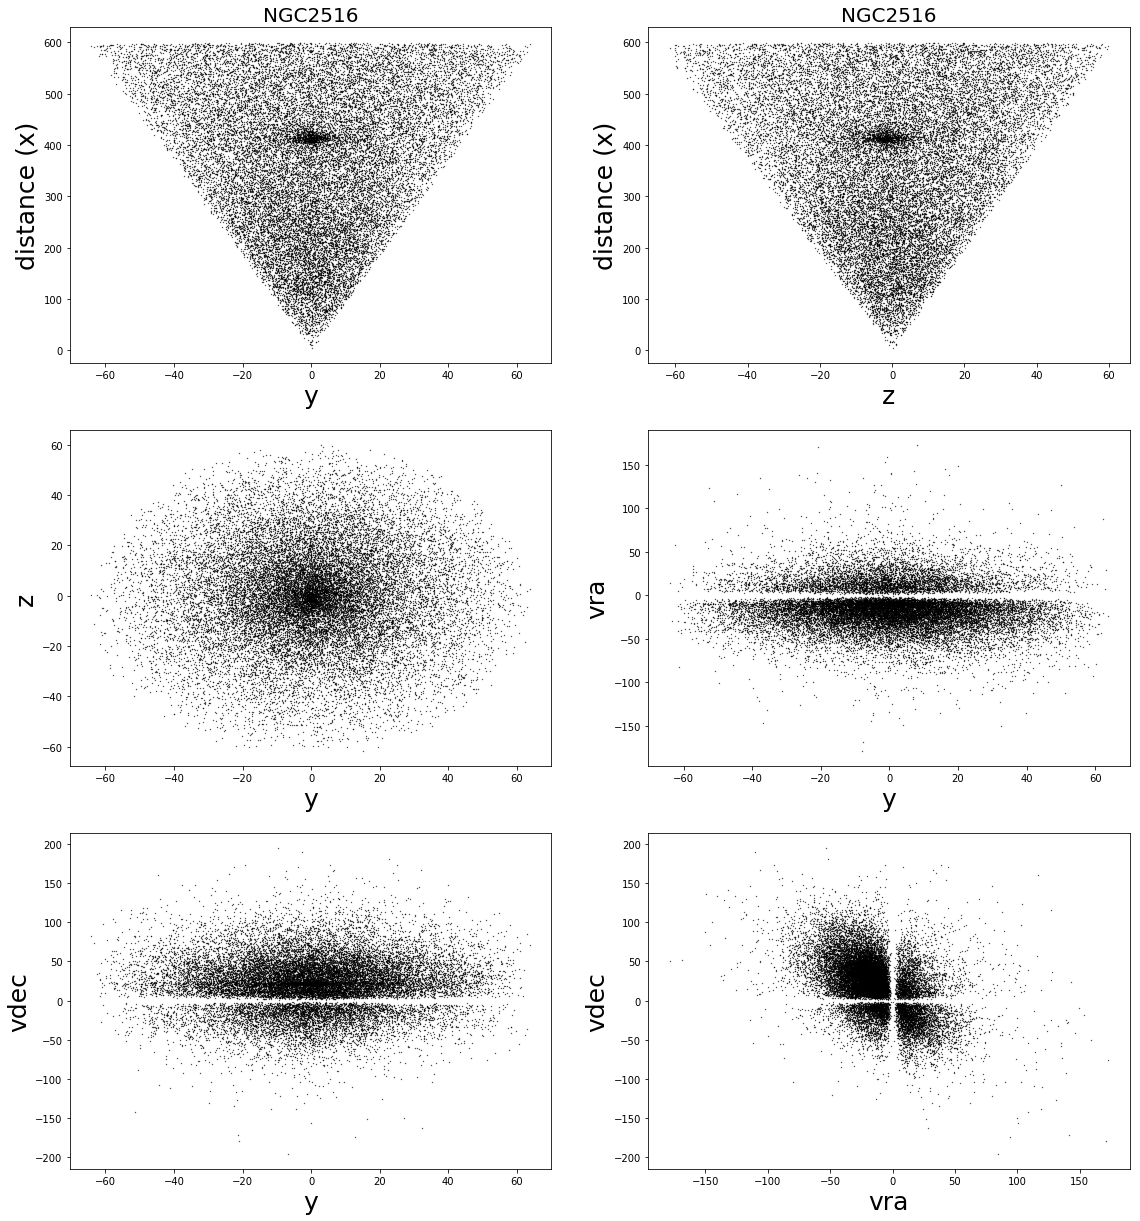

In [7]:
source.plot_information(0.1,True,ilabel=[],HRD=False)
#source.plot_information(0.001,False,ilabel=file_result[source.name]['ilabel'])

In [42]:
source = gu.source()
source.read_votable(voname)
source.convert_filter_data()
source.convert_to_cartesian()
source.set_weight(weight)
source.normalization_normal()

## NGC2516-6.0deg-0.2err.vot read...
## Total stars: 80414
## Density star per pc^3: 0.03218

## Conversion done...
## Stars selected: 78782
## Normalization done on filtered data..


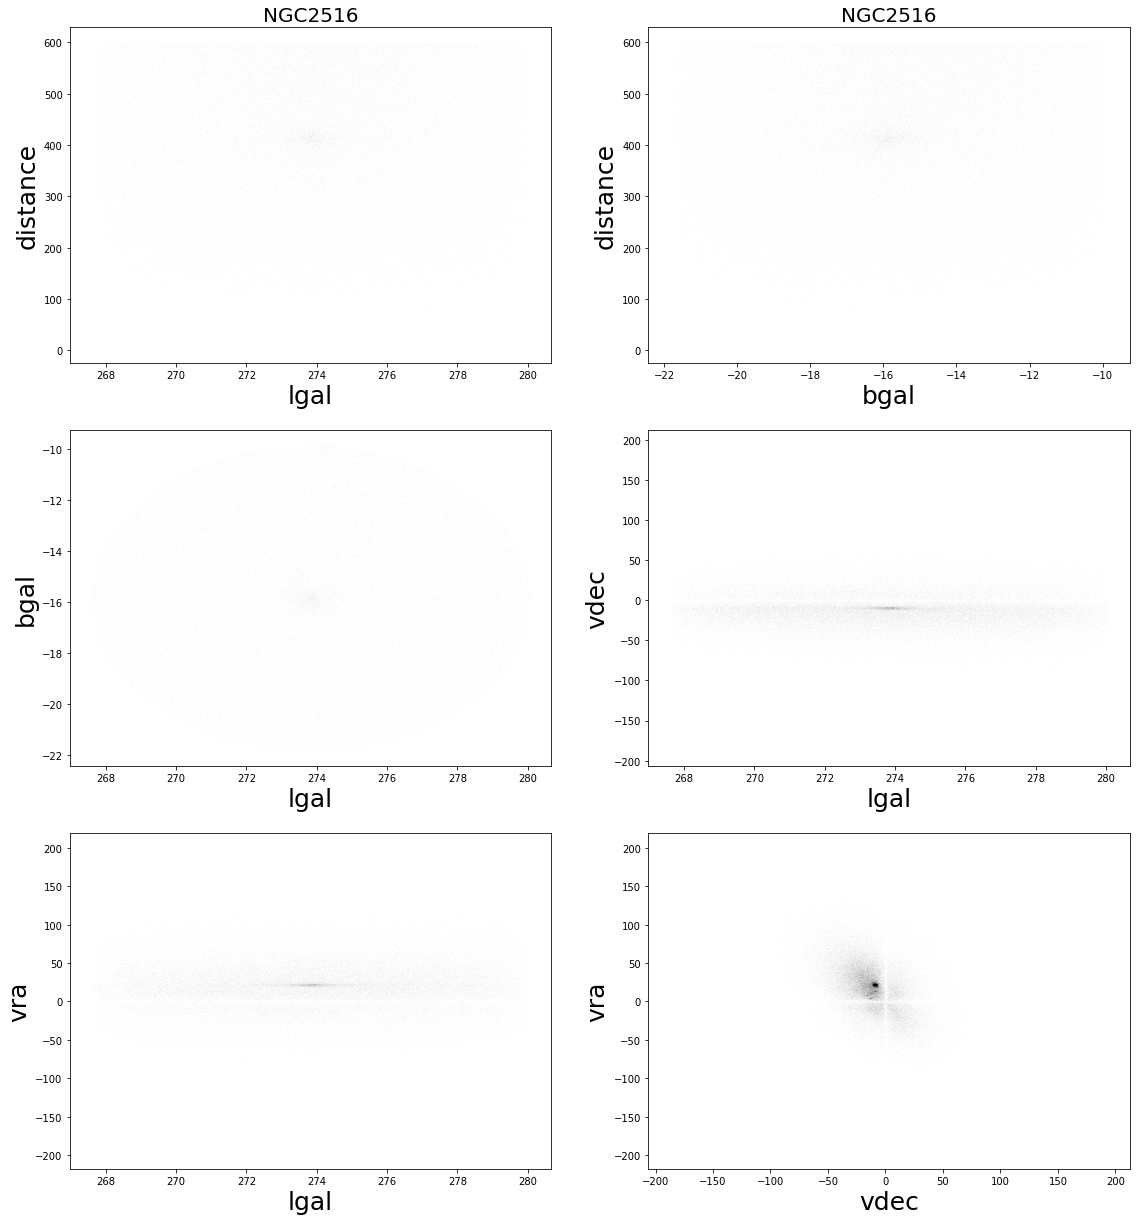

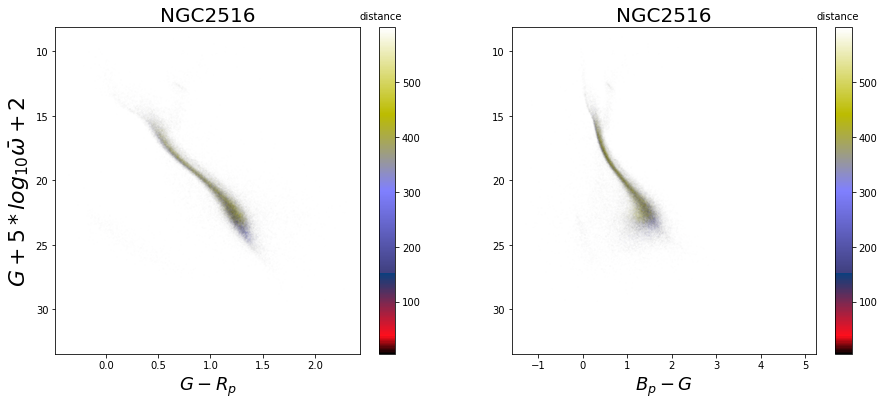

In [44]:
source.plot_information(0.00001,False,ilabel=[])

#### -------------------------------------------------------------------------

In [8]:
def save_ilabel(source, ilabel, eps, min_samples, version=1) :
    "Save ilabel found with dbscan(eps,min_samples,weight) from cluster 'source'"
    
    with open('ilabel_dbscan', 'rb') as fichier:
        my_depickler = pickle.Unpickler(fichier)
        file_result = my_depickler.load()
        
    # select data in cartesian from ilabel
    if source.dfcart is None :
        data_cart = gu.convert_to_cartesian(source.df[ilabel,:])
    else :
        data_cart = source.dfcart[ilabel,:]

    name = source.name
    if version != 1 :
        name = "%s_%d"%(name,version)
    
    if name not in file_result :
        file_result[name] = {}
    else :
        file_result.pop(name)

    file_result[name] = {}
    file_result[name]['eps_min_samples'] = (eps,min_samples)
    file_result[name]['weight'] = source.weight
    file_result[name]['data_cart'] = data_cart
    file_result[name]['ilabel'] = ilabel
    file_result[name]['density'] = source.density

    with open('ilabel_dbscan', 'wb') as fichier:
        my_pickler = pickle.Pickler(fichier)
        my_pickler.dump(file_result)

In [9]:
##############################################
def dbscan_labels(data, eps=0.15, min_samples=15, all_labels=False, display=True) :
    "Compte a DBSCAN clustering and return the largest cluster found"

    ts = time.clock()
    db = cluster.DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters_ > 0 :
        max_size = 0
        total_labels = []
        for i in range(n_clusters_) :
            ilabel = np.where(labels == i)[0]
            total_labels.append(ilabel)
            label_size = len(ilabel)
            if label_size > max_size :
                ilabel_final = np.copy(ilabel)
                max_size = label_size
        if all_labels : result = total_labels
        else          : result = ilabel_final
        if display :
            print("## %d clusters, size of the largest: %d  (on %d stars : %.1f%%)"%(n_clusters_,len(ilabel_final),len(data[:,1]),100*len(ilabel_final)/len(data[:,1])))
            tf = time.clock() - ts
            if tf//60 == 0 : string = "%.1fs"%(tf%60)
            else : string = "%dmin %.1fs"%(tf//60,tf%60)
            print("## Execution time : "+string)
        return result
    else :
        print("ERROR 0 cluster found with eps="+str(eps)+" and min_samples="+str(min_samples))
        return []


#### -------------------------------------------------------------------------
## DBSCAN Clustering

In [6]:
#save_ilabel(source,file_result_DAM[source.name]['ilabel'],file_result_DAM[source.name]['eps_min_samples'][0],file_result_DAM[source.name]['eps_min_samples'][1])

In [15]:
weight  = [6*2000/source.distmax,2,2,4,4,4,4,4]
WEIGHT  = [10.7, 6.5, 6.5, 4.1, 4.1, 2.1, 2.1, 2.1]
source.set_weight(weight)
source.normalization_normal()
#print(file_result["NGC2516"]['density'])
#print(source.density)

## Normalization done on filtered data..


In [19]:
print(file_result["NGC2516"]['eps_min_samples'])
print(source.distmax)

(1.4, 20)
800.0


In [55]:
eps=1.7
min_samples=20
ilabel_ = source.dbscan_labels(eps, min_samples, all_labels=True, display=True)
#save_ilabel(source, ilabel_[0], eps, min_samples)

## 1 clusters, size of the largest: 2801  (on 44723 stars : 6.3%)
## Execution time : 4.8s


In [50]:
for i, ilabel in enumerate(ilabel_):
    #a = np.zeros(source.df.shape[0])
    #a[ilabel] = 1
    #ii = np.where(a==0)[0]
    #gu.plot_information_cluster(source.dfcart[ii,:],size=0.01,cartesian=True)
    #gu.plot_information_cluster(source.dfcart,size=0.01,cartesian=True)
    print("## %d, %d stars, Dist : %.1f, Max Dist : %.1f and %.1f"%(i,len(ilabel),np.mean(source.df[ilabel,0]),
    np.max(source.df[ilabel,0])-np.min(source.df[ilabel,0]),np.max(source.dfcart[ilabel,1])-np.min(source.dfcart[ilabel,1])))

## 0, 2801 stars, Dist : 414.5, Max Dist : 165.9 and 39.4


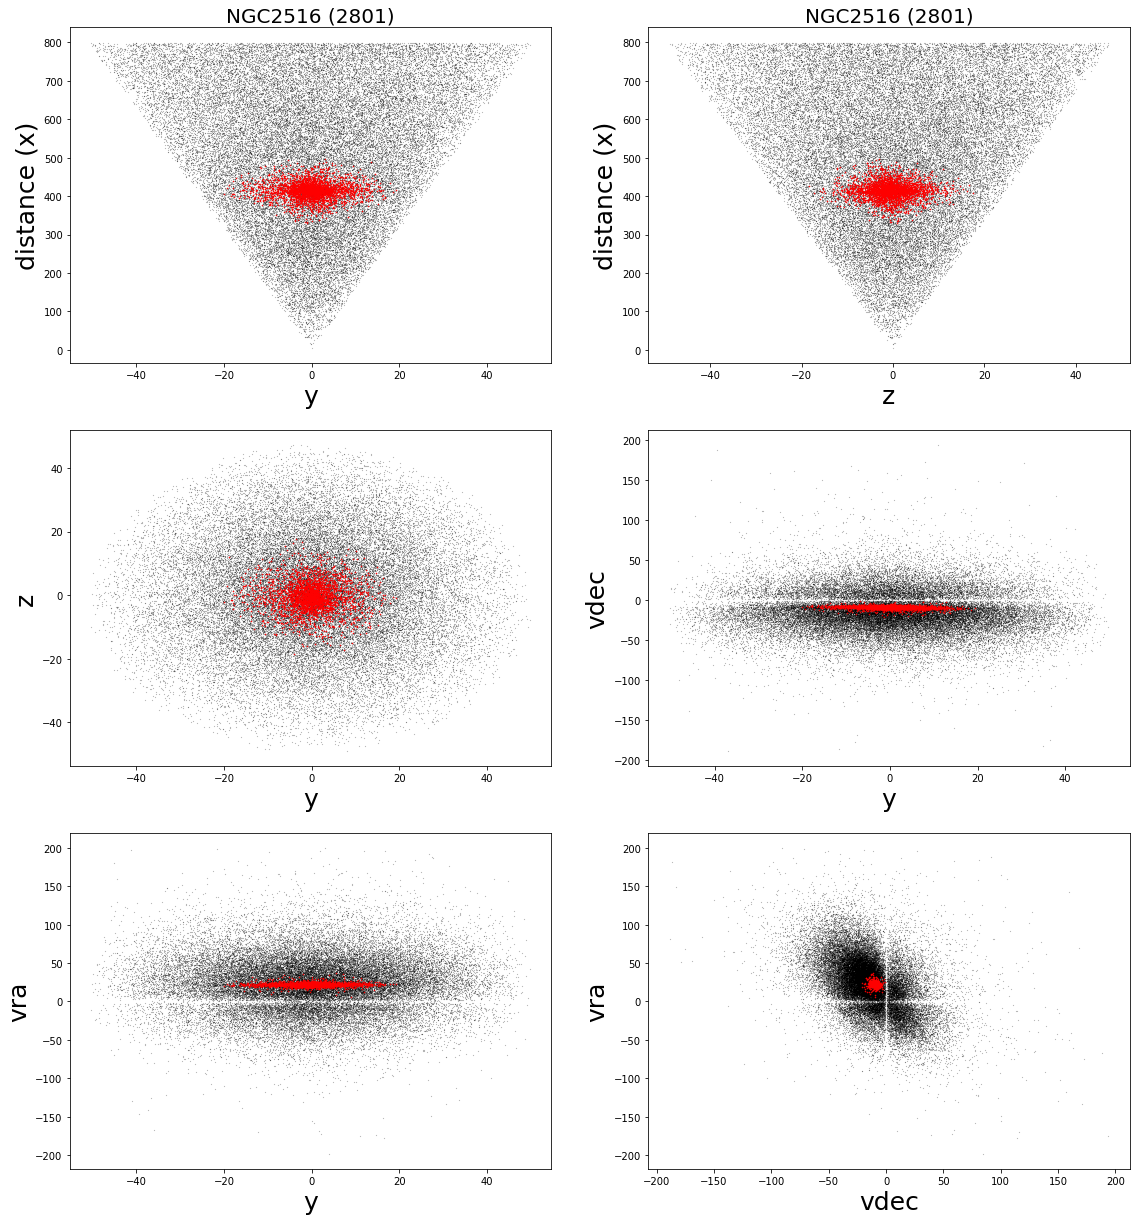

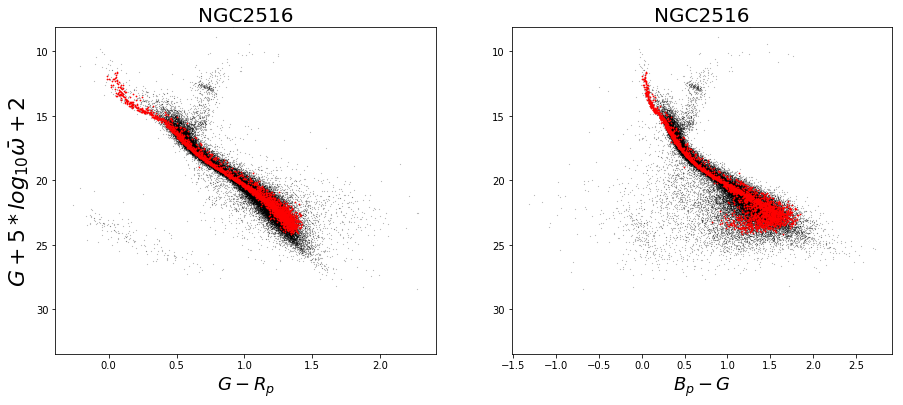

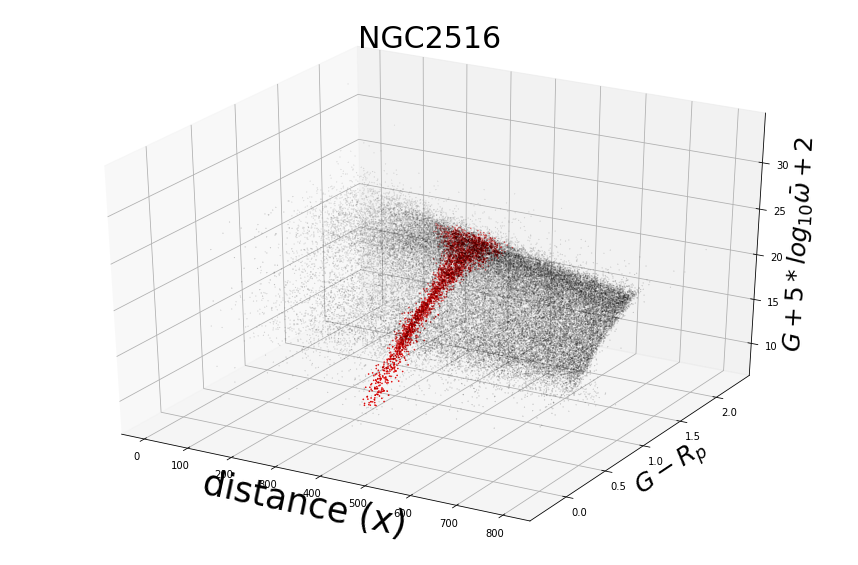

In [51]:
for ilabel in ilabel_ :
    #source.plot_information(0.1,False, HRD=False, ilabel=ilabel)
    source.plot_information(0.01,True, HRD=True, ilabel=ilabel)
    source.plot_3D(0.01,True,(0,6,5),ilabel=ilabel)

#### ------------------------------------------------------------------------
## Finding the best $eps$ and $min\_samples$

In [80]:
# #############################################################################
# Compute DBSCAN
ts = time.clock()
eps_ = [0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3]
min_samples_ = [10,15,20,25,30,40,50,60]
mat_nb_clusters = np.zeros((len(eps_),len(min_samples_)))
mat_max = np.zeros((len(eps_),len(min_samples_)))
for i in range(len(eps_)) :
    for j in range(len(min_samples_)) :
        db = DBSCAN(eps=eps_[i], min_samples=min_samples_[j]).fit(dfnormcart)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        mat_nb_clusters[i,j] = n_clusters_
        max_label = 0
        for n in range(n_clusters_) :
            ilabel = np.where(labels == n)[0]
            if len(ilabel) > max_label :
                max_label = len(ilabel)
                #max_label = len(ilabel)/np.max(source.dfcart[ilabel,1])-np.min(source.dfcart[ilabel,1])
        mat_max[i,j] = max_label
        #print("Ok pour eps "+str(eps_[i])+" et min_samples="+str(min_samples_[j]))
tf = time.clock() - ts
if tf//60 == 0 : string = "%.1fs"%(tf%60)
else : string = "%dmin %.1fs"%(tf//60,tf%60)
print("## Execution time : "+string)

## Execution time : 20.9s


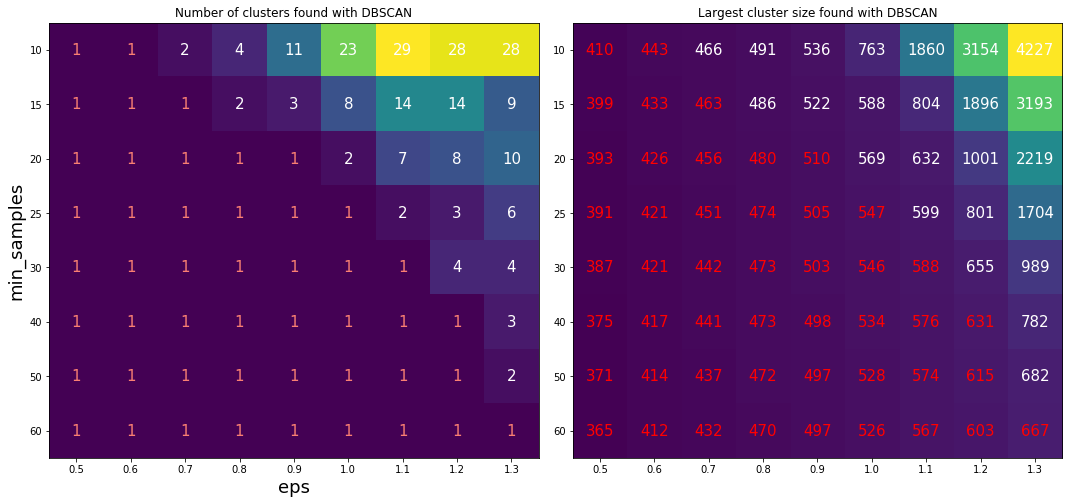

In [81]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(15,15))

im = ax.imshow(mat_nb_clusters.T)
ax.set_xticks(np.arange(len(eps_)))
ax.set_yticks(np.arange(len(min_samples_)))
ax.set_xticklabels(eps_)
ax.set_yticklabels(min_samples_)
# Loop over data dimensions and create text annotations.
for i in range(len(eps_)):
    for j in range(len(min_samples_)):
        if mat_nb_clusters[i, j] == 1 : color = "salmon"
        else : color = "w" 
        text = ax.text(i, j, '%d'%mat_nb_clusters[i, j],
                       ha="center", va="center", color=color, fontproperties='bold', fontsize=15)
ax.set_title("Number of clusters found with DBSCAN")
ax.set_xlabel("eps", fontsize = 18)
ax.set_ylabel("min_samples", fontsize = 18)
fig.tight_layout()

im = ax2.imshow(mat_max.T)
ax2.set_xticks(np.arange(len(eps_)))
ax2.set_yticks(np.arange(len(min_samples_)))
ax2.set_xticklabels(eps_)
ax2.set_yticklabels(min_samples_)
# Loop over data dimensions and create text annotations.
for i in range(len(eps_)):
    for j in range(len(min_samples_)):
        if mat_nb_clusters[i, j] == 1 : color = "r"
        else : color = "w" 
        text = ax2.text(i, j, '%d'%mat_max[i, j], ha="center", va="center", color=color, fontsize=15)
ax2.set_title("Largest cluster size found with DBSCAN")
ax.set_xlabel("eps", fontsize = 18)
ax.set_ylabel("min_samples", fontsize = 18)
fig.tight_layout()

plt.savefig('NGC6811_.png')
plt.show()

In [246]:
tab_eps = np.linspace(0.3,1.3,300)
min_samples = 30
label_pre = []
result = []
ts = time.clock()

for eps in tab_eps :
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(dfnormcart)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    big_label = np.where(labels == 0)[0]
    for n in range(1,n_clusters) :
        ilabel = np.where(labels == n)[0]
        if len(ilabel) > len(big_label) :
            big_label = ilabel
       
    if len(label_pre) < len(big_label) :
        result.append((big_label,eps))
    
tf = time.clock() - ts
if tf//60 == 0 : string = "%.1fs"%(tf%60)
else : string = "%dmin %.1fs"%(tf//60,tf%60)
print(string)

4min 53.1s


In [247]:
x = []; s = []; y0 = []
y = {}
for i in range(8) :
    y[i] = []
    
for label in result :
    x.append(label[1])
    #s.append(len(label[0]))
    s.append(np.sqrt(np.mean(np.linalg.norm(source.dfcart[label[0],:3] - np.mean(source.dfcart[label[0],:3],axis=0))**2))/len(label[0])**2)
    for i in range(8) :
        y[i].append(np.std(source.dfcart[label[0],i]))
    y0.append( np.sqrt(np.mean(np.linalg.norm(source.dfcart[label[0],:3] - np.mean(source.dfcart[label[0],:3],axis=0))**2)) )

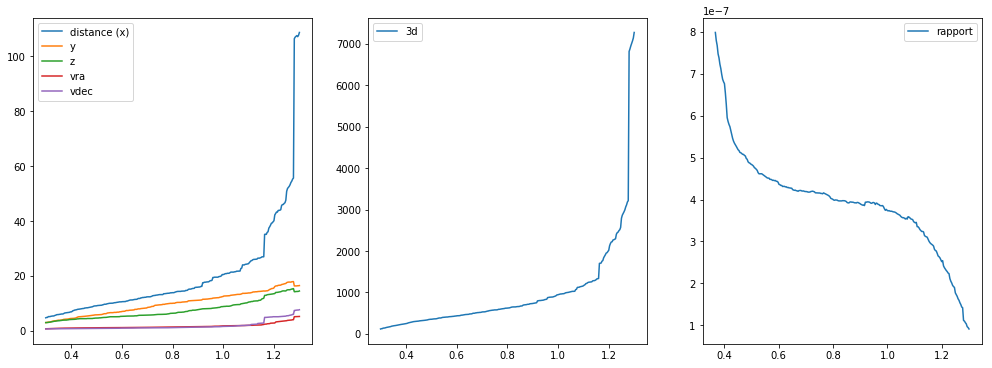

In [248]:
plt.figure(figsize=(17,6))
plt.subplot(131)
for i in range(0,5) : 
    plt.plot(x,y[i],label=gu.data_name_cart[i])
plt.legend(loc=0)
plt.subplot(132)
plt.plot(x,y0,label='3d')
plt.legend(loc=0)
plt.subplot(133)
plt.plot(x[20:],s[20:],label='rapport')
plt.legend(loc=0)
plt.show()

0.3


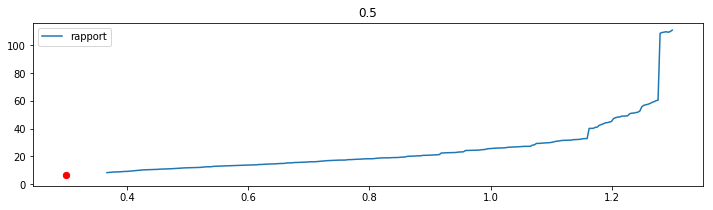

0.3


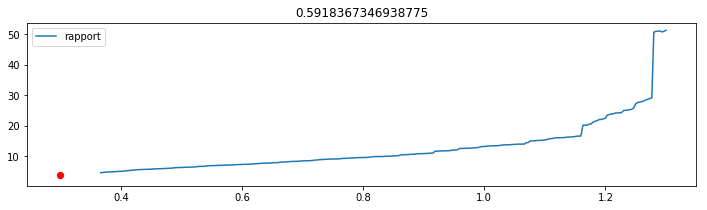

0.3


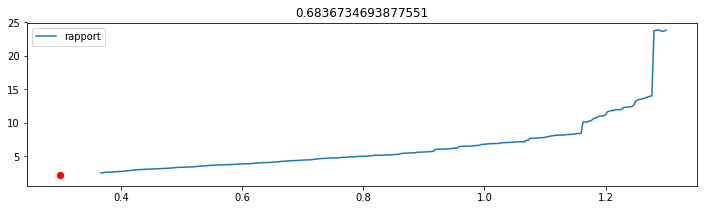

0.3


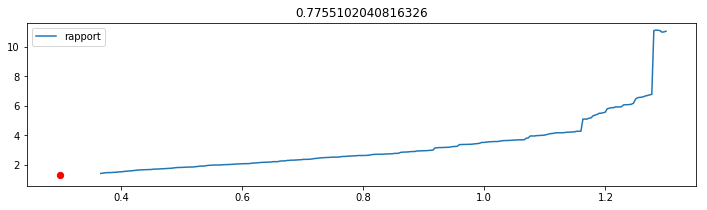

0.3066889632107023


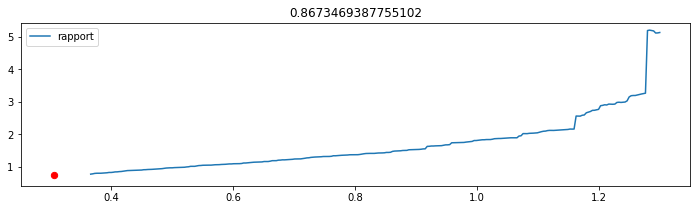

0.320066889632107


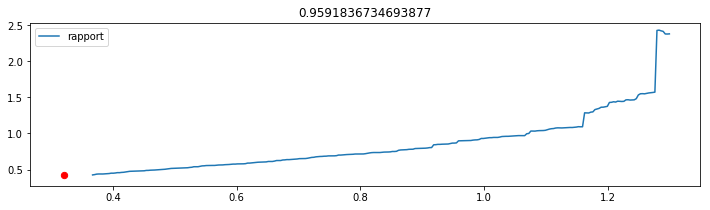

0.35351170568561874


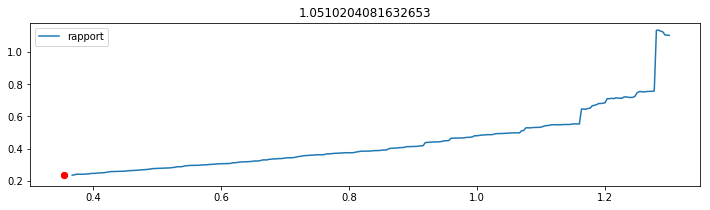

0.3668896321070234


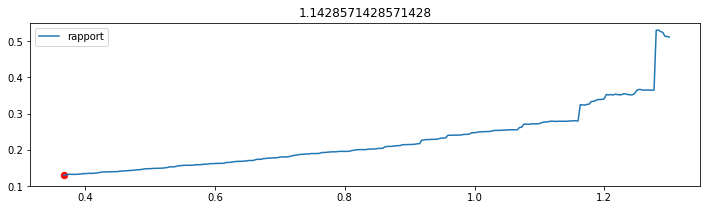

0.3668896321070234


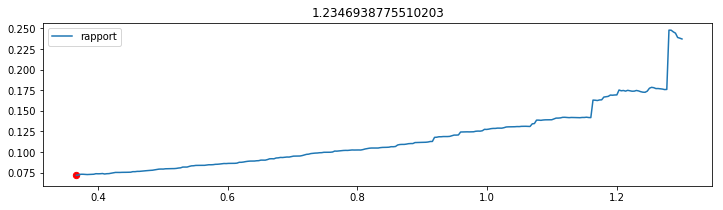

0.3668896321070234


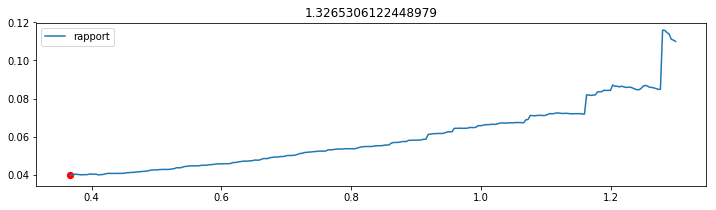

0.4103678929765886


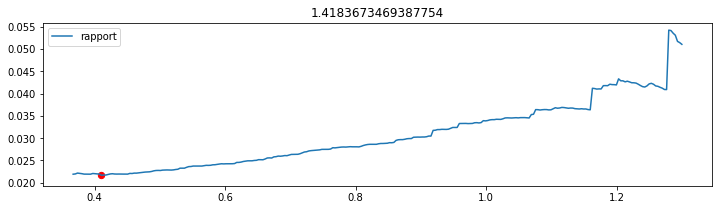

0.4103678929765886


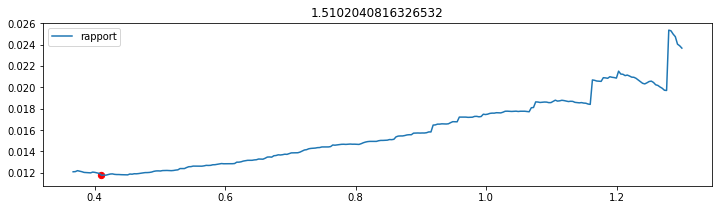

0.4505016722408027


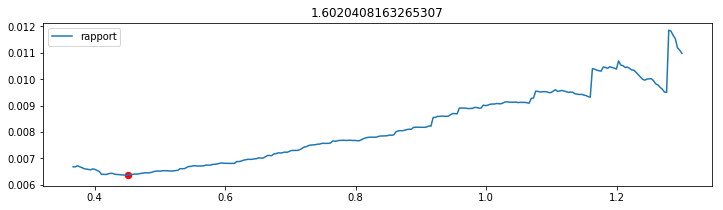

0.4505016722408027


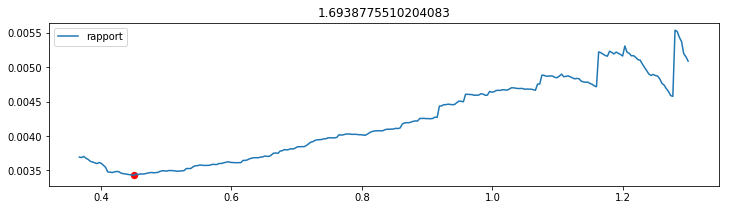

0.4505016722408027


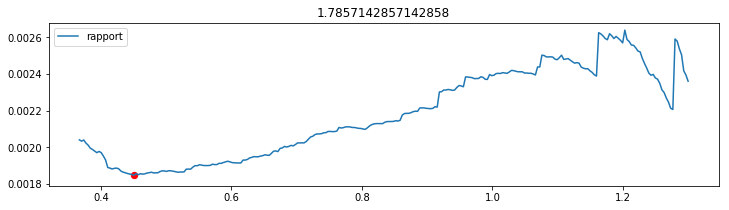

0.4505016722408027


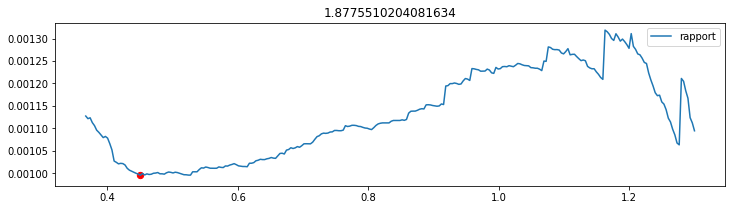

0.5274247491638796


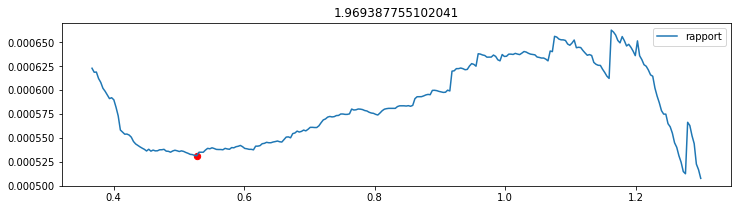

0.5274247491638796


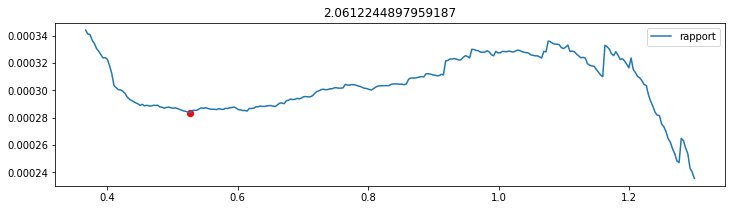

0.6143812709030101


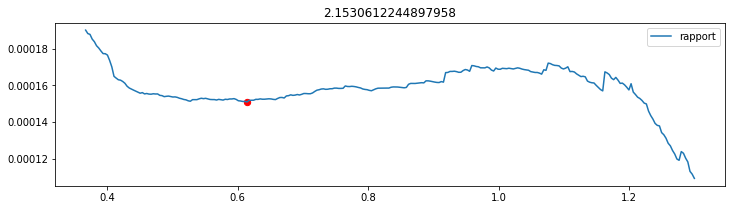

0.6143812709030101


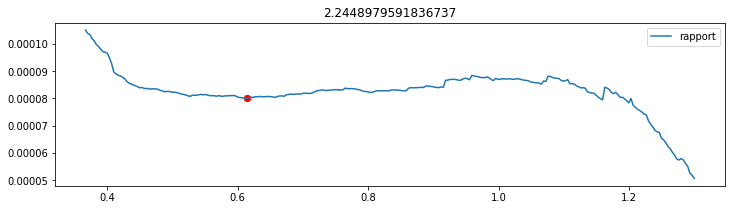

0.6143812709030101


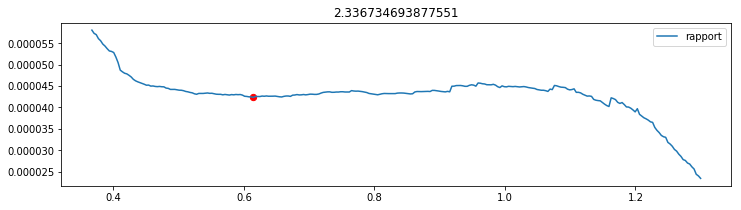

0.6578595317725753


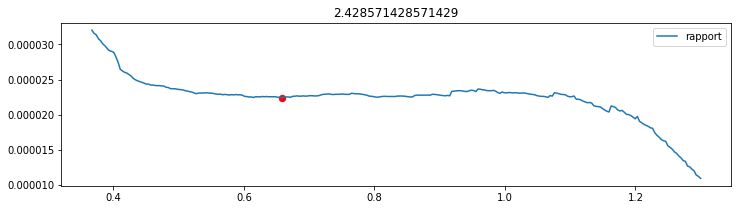

0.8551839464882942


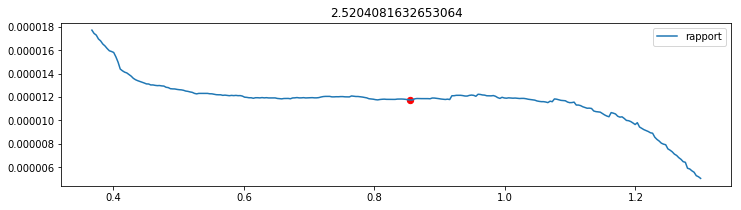

0.9153846153846155


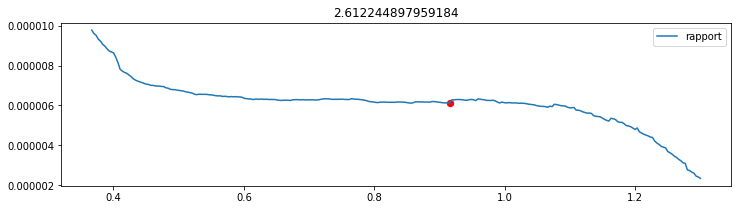

0.9153846153846155


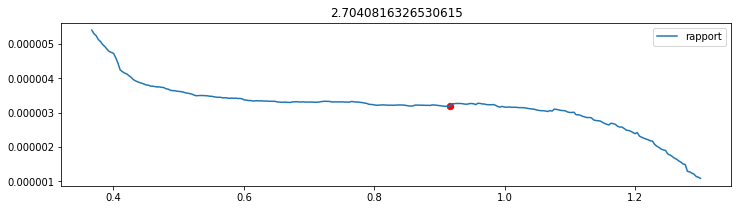

0.9153846153846155


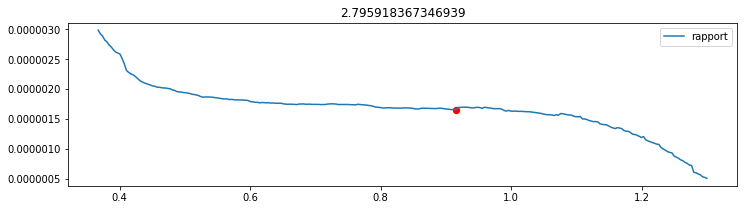

0.9153846153846155


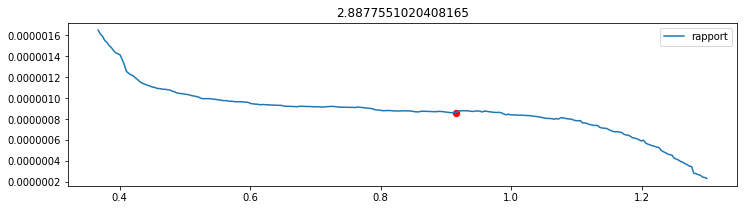

0.9153846153846155


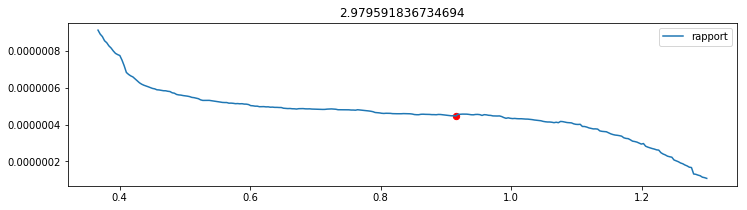

0.9153846153846155


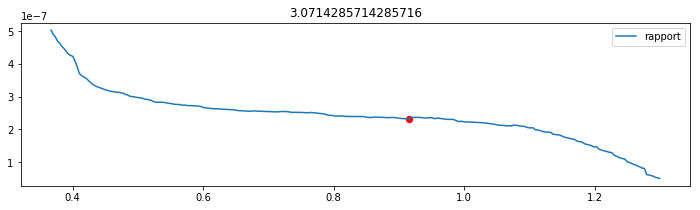

0.965551839464883


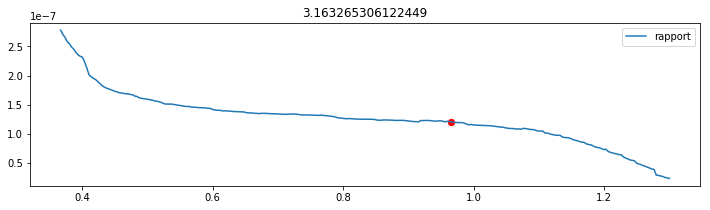

0.965551839464883


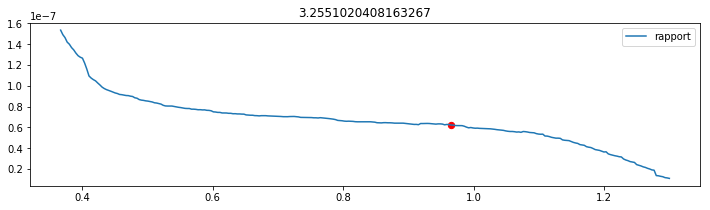

0.965551839464883


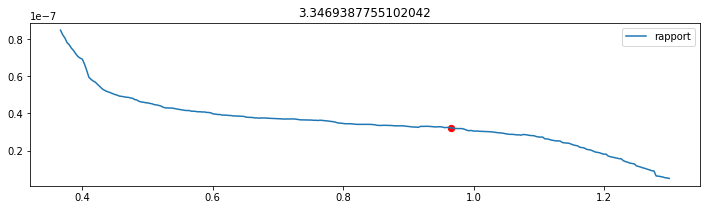

0.965551839464883


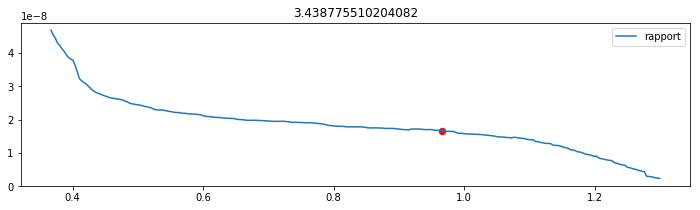

0.965551839464883


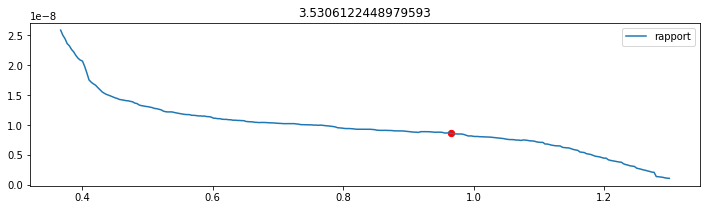

0.965551839464883


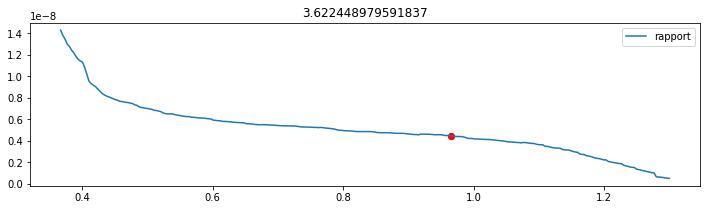

0.965551839464883


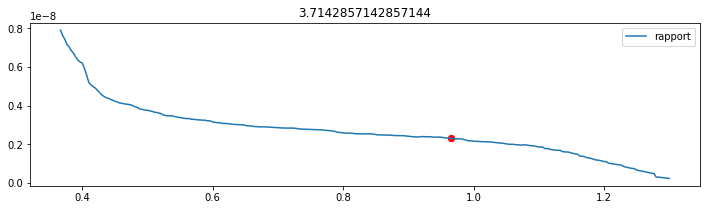

0.965551839464883


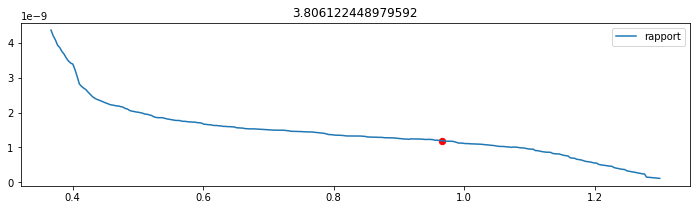

0.965551839464883


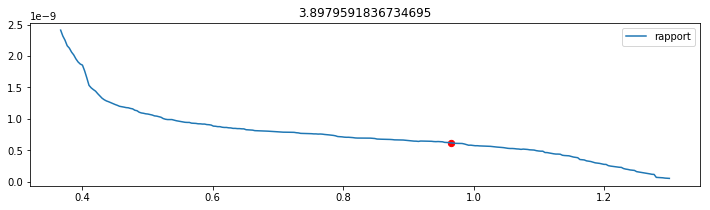

0.965551839464883


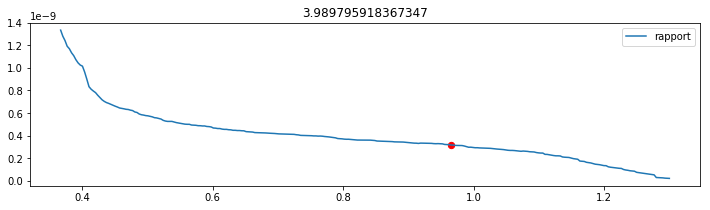

0.965551839464883


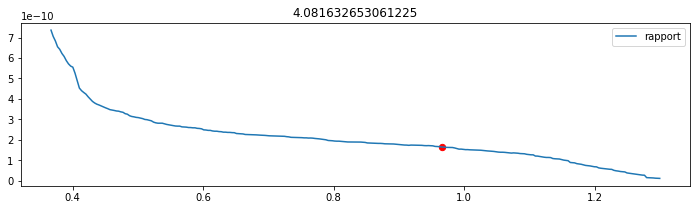

0.965551839464883


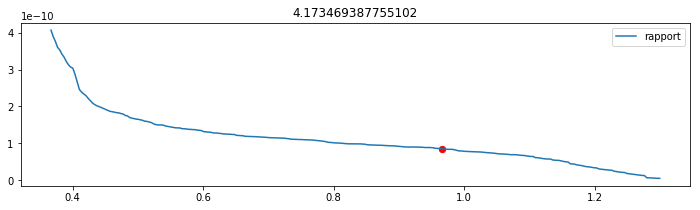

0.965551839464883


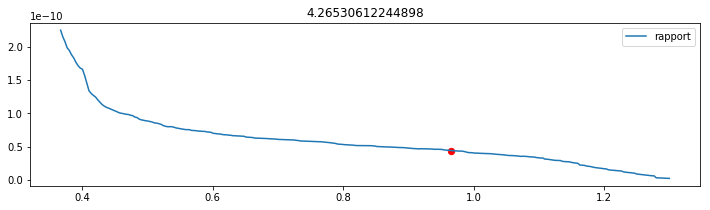

0.965551839464883


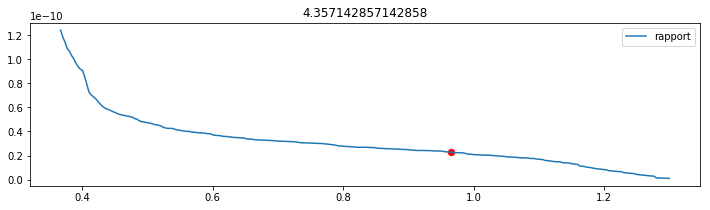

0.965551839464883


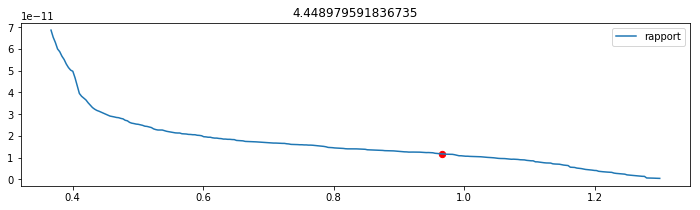

0.965551839464883


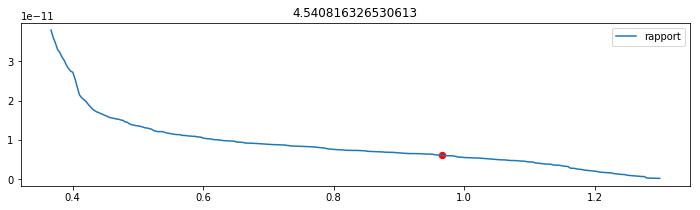

0.965551839464883


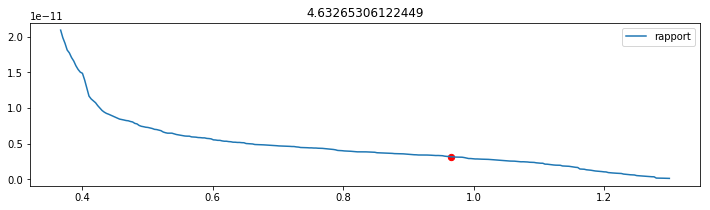

0.965551839464883


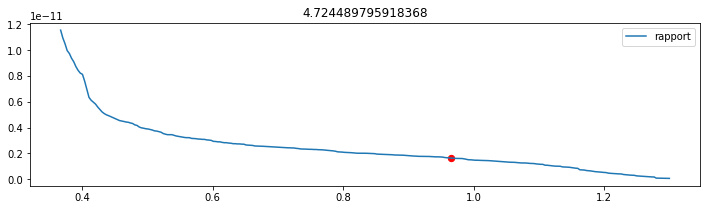

0.965551839464883


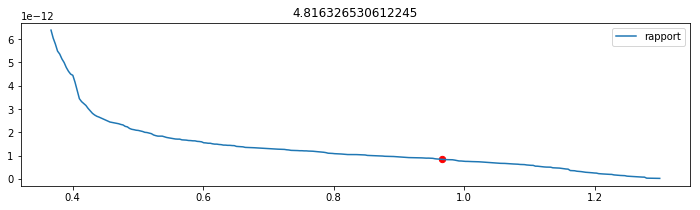

0.965551839464883


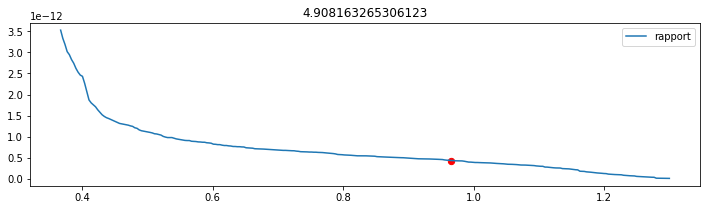

0.965551839464883


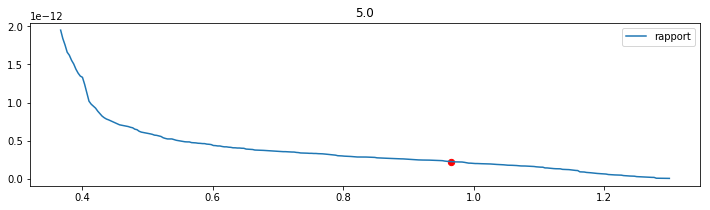

In [249]:
loc_min = []
exponant = np.linspace(0.5,5,50)
for exp in exponant :
#for exp in [2.0] :
    x = []; s = []
    for label in result :
        x.append(label[1])
        #s.append(len(label[0]))
        s.append(np.sqrt(np.mean(np.linalg.norm(source.dfcart[label[0],:3] - np.mean(source.dfcart[label[0],:3],axis=0))**2))/len(label[0])**exp)
    print(x[np.argmin(s[:200])])
    loc_min.append(x[np.argmin(s[:200])])
    plt.figure(figsize=(12,3))
    plt.plot(x[20:],s[20:],label='rapport')
    plt.scatter(x[np.argmin(s[:200])],min(s[:200]),c='r',s=40)
    plt.legend(loc=0)
    plt.title(exp)
    plt.show()

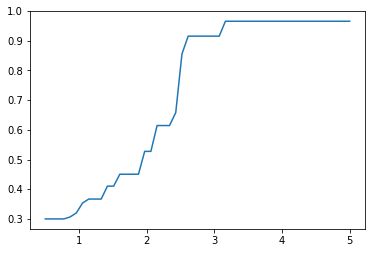

In [250]:
plt.plot(exponant,loc_min)
plt.show()

## -------------------------------------------------

In [11]:
a = []
for i in range(8) :
    dist = np.sort(source.dfcart[:,i])
    distm = dist[1:] - dist[:-1]
    a.append(np.mean(distm))
a = np.array(a)
print(a*1000)
print(1/a)
div = [15,8,0.5,0.07]

[24.95616913  5.36191234  5.08807269 14.72495923 16.33957355  0.99576171
  0.11059028  0.14162818]
[  40.07025255  186.50062455  196.53807253   67.91190281   61.20110765
 1004.25632861 9042.38589553 7060.74172254]


In [67]:
a = []
for i in range(8) :
    dist = np.sort(source2.dfcart[:,i])
    distm = dist[1:] - dist[:-1]
    a.append(np.mean(distm))
a = np.array(a)
print(a*1000)
print(1/a)
div = [15,8,0.5,0.07]

[52.19365368 11.21885929 10.49950993 27.84697657 31.65082113  2.00536881
  0.21025291  0.28285315]
[  19.15941747   89.13562188   95.24254051   35.91054122   31.59475692
  498.66139162 4756.17682183 3535.40339702]


In [12]:
def lissage(x,y,p):
    "smoothing y data computing the Moving average"
    Lyout=[]; Lxout = np.copy(x[p: -p])
    for index in range(p, len(y)-p):
        Lyout.append(np.mean(y[index-p : index+p+1]))
    return Lxout,Lyout

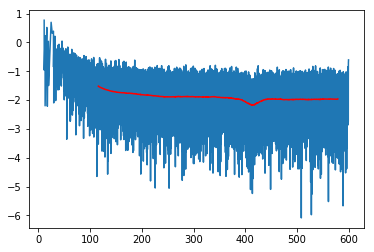

0.024956169134300637


In [13]:
dist = np.sort(source.dfcart[:,0])
distm = dist[1:] - dist[:-1]  
x, y = lissage(dist[1:],np.log10(distm), 1000)
plt.plot(dist[1:],np.log10(distm))
plt.plot(x,y,c='r')
plt.show()
print(np.mean(distm))

## ------------------------------------------------------------
### Loop to get all votable in the list

In [308]:
voname_list = ["NGC2682-4.0deg-0.2err.vot", "NGC2516-6.0deg-0.2err.vot", "NGC1647-4.0deg-0.2err.vot", "NGC6811-1.0deg-0.2err.vot"]
#tab_source = []
tab_ilabel = []
for voname in [voname_list[-1]] :
    source = gu.source()
    source.read_votable(voname)
    source.convert_filter_data()
    source.convert_to_cartesian()
    tab_source.append(source)
    
    ilabel = file_result[source.name]['ilabel']
    tab_ilabel.append(ilabel)

## NGC6811-1.0deg-0.2err.vot read...
## Total stars: 12084
## Density star per pc^3: 0.00925

## Conversion done...
## Stars selected: 11886


In [310]:
for source in tab_source :
    print(source.name)

NGC2682
NGC2516
NGC1647
NGC6811


## -------------------------------------------------------------------
## Weight and cartesian clustering

In [496]:
a = []
for i in range(8) :
    dist = np.sort(dfnormcart[:,i])
    distm = dist[1:] - dist[:-1]
    a.append(np.mean(distm))
a = np.array(a)
print(a*10000)
#print(1/a)
div = [15,8,0.5,0.07]

[ 86.36905789   3.03601531   3.08374582 547.98286674 669.63590093
  15.93015054  11.70810351  20.19901193]


In [497]:
source = tab_source[0]
b = []
div = [15, 0.5, 0.9, 0.15]
for source in tab_source :
    print(source.name)
    dfnormcart = np.zeros(source.df.shape)
    for i, j in zip(range(source.df.shape[1]),[0,0,0,1,1,2,3,3]) :
        weight_comp[j] * (source.dfcart[:,i] - np.mean(source.dfcart[:,i]))
    a = []
    for i in range(8) :
        dist = np.sort(source.dfcart[:,i])
        distm = dist[1:] - dist[:-1]
        a.append(np.mean(distm))
        if i == 0 : b.append(np.array(sorted(distm)))
    a = np.array(a)
    print(a[:4]*10000,"density : %.2f"%(100*source.density))
    #print(1/a)
    div = [15, 0.5, 0.9, 0.15]

NGC2682
[281.25101635  45.63279334  38.25870865  78.99809852] density : 0.41
NGC2516
[75.48450033 16.41927111 15.76036564 48.37125212] density : 3.22
NGC1647
[229.81443453  32.82668789  32.07185434  85.93452683] density : 1.06
NGC6811
[1295.53586835   45.54022963   46.25618729  273.99143337] density : 0.92


In [58]:
#source = tab_source[2]
# Cartesian normalisation
# x, y, z must have the same importance, the same for vdec and vra // R-G and 
dfnormcart = np.zeros(source.df.shape)

#weight  = [6*2000/source.distmax,2,2,4,4,4,4,4]
weight_comp  = [0.03,0.2,0.25,2.]

for i, j in zip(range(source.df.shape[1]),[0,0,0,1,1,2,3,3]) :
    dfnormcart[:,i] = weight_comp[j] * (source.dfcart[:,i] - np.mean(source.dfcart[:,i]))

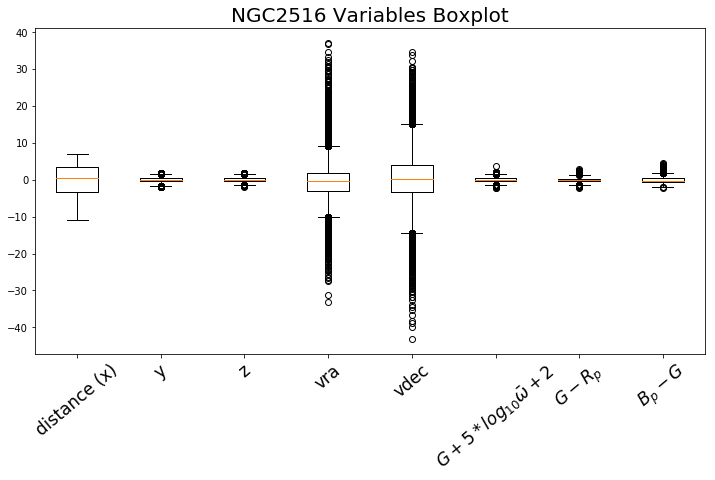

In [59]:
plt.figure(figsize=(12,6))
plt.title("%s Variables Boxplot"%source.name, fontsize=20)
plt.boxplot(dfnormcart)
plt.xticks(np.arange(len(gu.data_name_cart))+1, gu.data_name_cart, rotation = 40, fontsize = 17)
plt.show()

In [241]:
#source = tab_source[2]
# Cartesian normalisation
# x, y, z must have the same importance, the same for vdec and vra // R-G and 
dfnormcart = np.zeros(source.df.shape)

#weight  = [6*2000/source.distmax,2,2,4,4,4,4,4]
weight_comp  = [0.03,0.2,0.25,2.]

for i, j in zip(range(source.df.shape[1]),[0,0,0,1,1,2,3,3]) :
    dfnormcart[:,i] = weight_comp[j] * (source.dfcart[:,i] - np.mean(source.dfcart[:,i]))

In [236]:
source2 = source3
source3 = source
source = source2

In [251]:
eps=0.6
min_samples=30
#source = tab_source[2]
ilabel_ = dbscan_labels(dfnormcart,eps, min_samples, all_labels=True, display=True)
#save_ilabel(source, ilabel, eps, min_samples, version=2)
#print("## %d, %d stars, Dist : %.1f, Max Dist : %.1f and %.1f"%(i,len(ilabel),np.mean(source.df[ilabel,0]),
#    np.max(source.df[ilabel,0])-np.min(source.df[ilabel,0]),np.max(source.dfcart[ilabel,1])-np.min(source.dfcart[ilabel,1])))

## 1 clusters, size of the largest: 999  (on 23830 stars : 4.2%)
## Execution time : 0.7s


In [252]:
for i, ilabel in enumerate(ilabel_):
    #a = np.zeros(source.df.shape[0])
    #a[ilabel] = 1
    #ii = np.where(a==0)[0]
    #gu.plot_information_cluster(source.dfcart[ii,:],size=0.01,cartesian=True)
    #gu.plot_information_cluster(source.dfcart,size=0.01,cartesian=True)
    print("## %d, %d stars, Dist : %.1f, Max Dist : %.1f and %.1f"%(i,len(ilabel),np.mean(source.df[ilabel,0]),
    np.max(source.df[ilabel,0])-np.min(source.df[ilabel,0]),np.max(source.dfcart[ilabel,1])-np.min(source.dfcart[ilabel,1])))

## 0, 999 stars, Dist : 415.0, Max Dist : 79.7 and 60.3


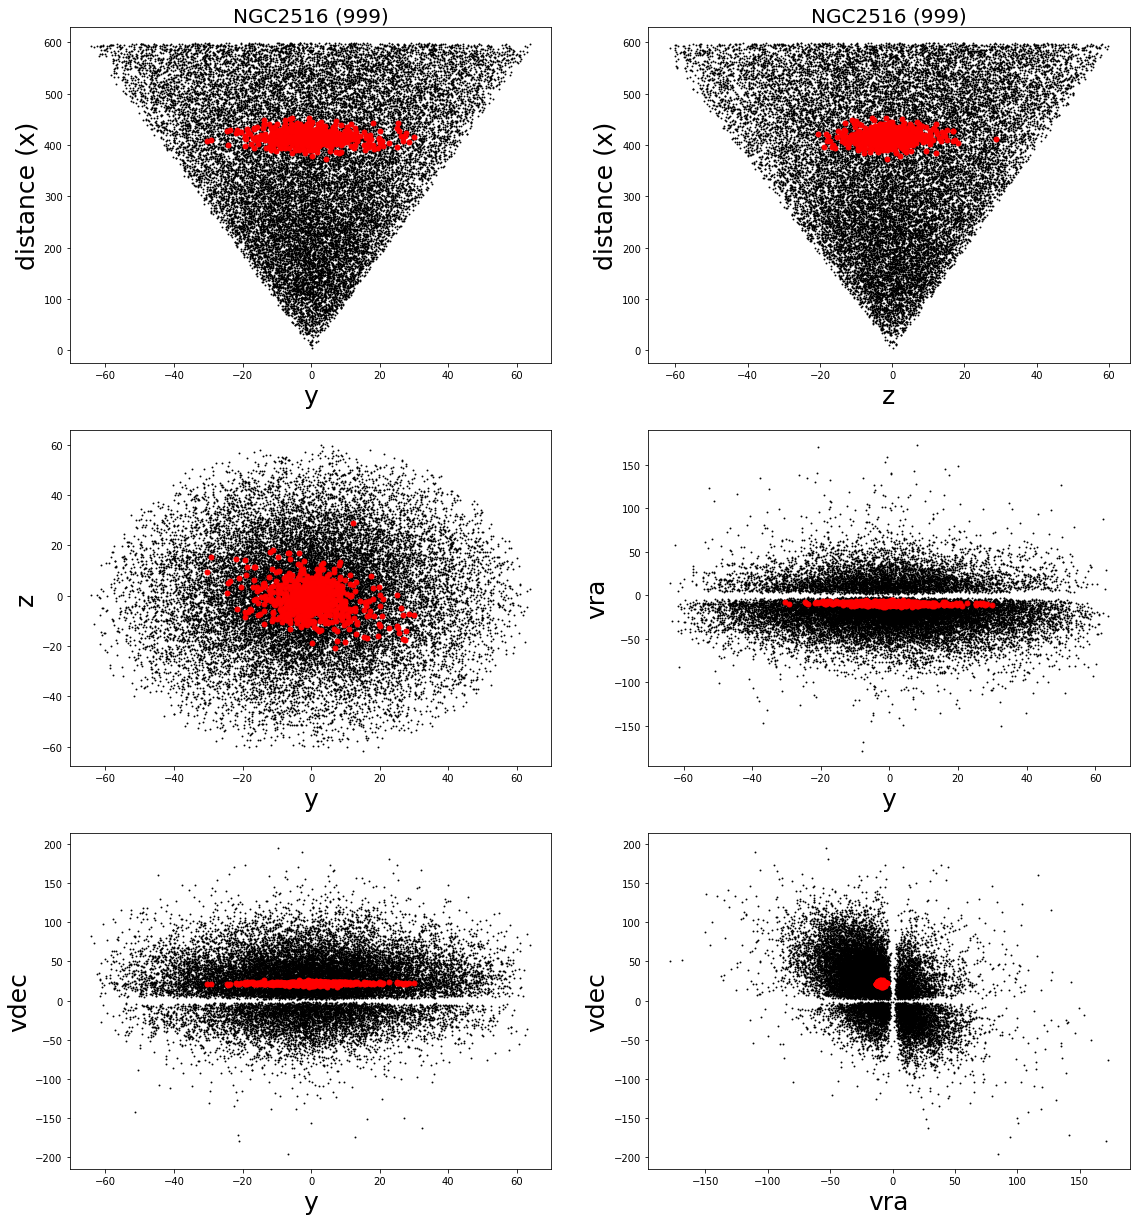

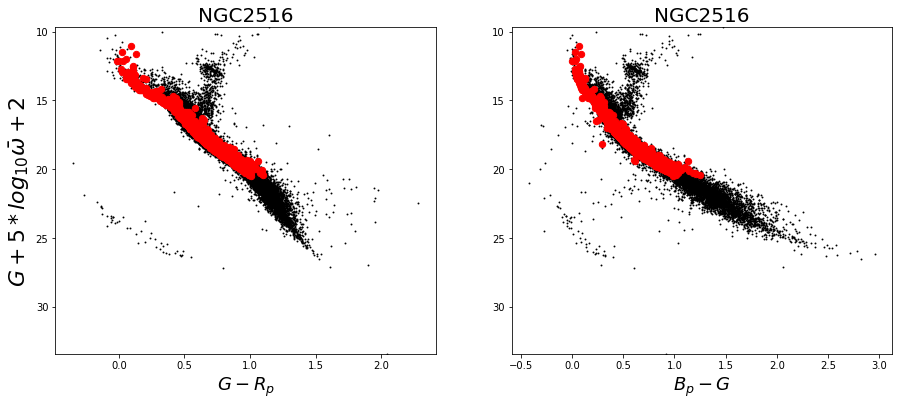

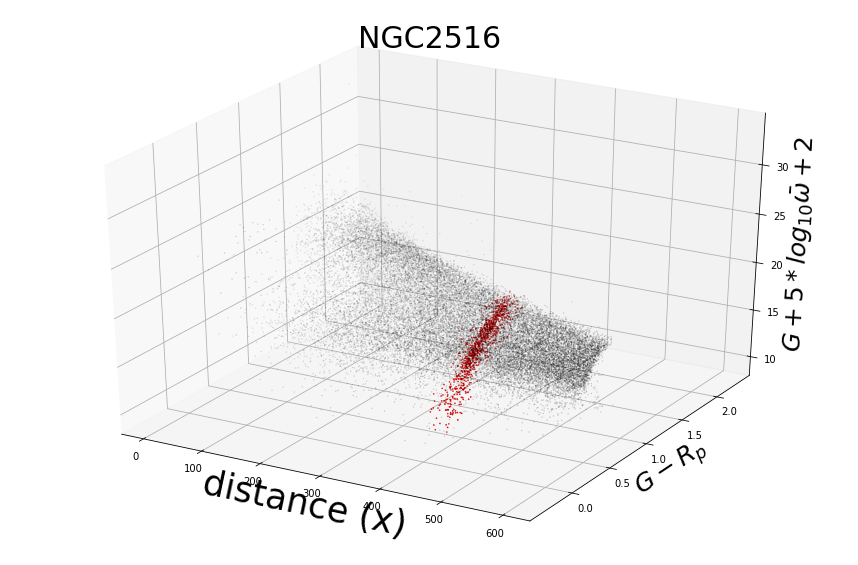

In [253]:
for ilabel in ilabel_ :
    #source.plot_information(0.1,False, HRD=False, ilabel=ilabel)
    source.plot_information(0.81,True, HRD=True, ilabel=ilabel)
    source.plot_3D(0.01,True,(0,6,5),ilabel=ilabel)

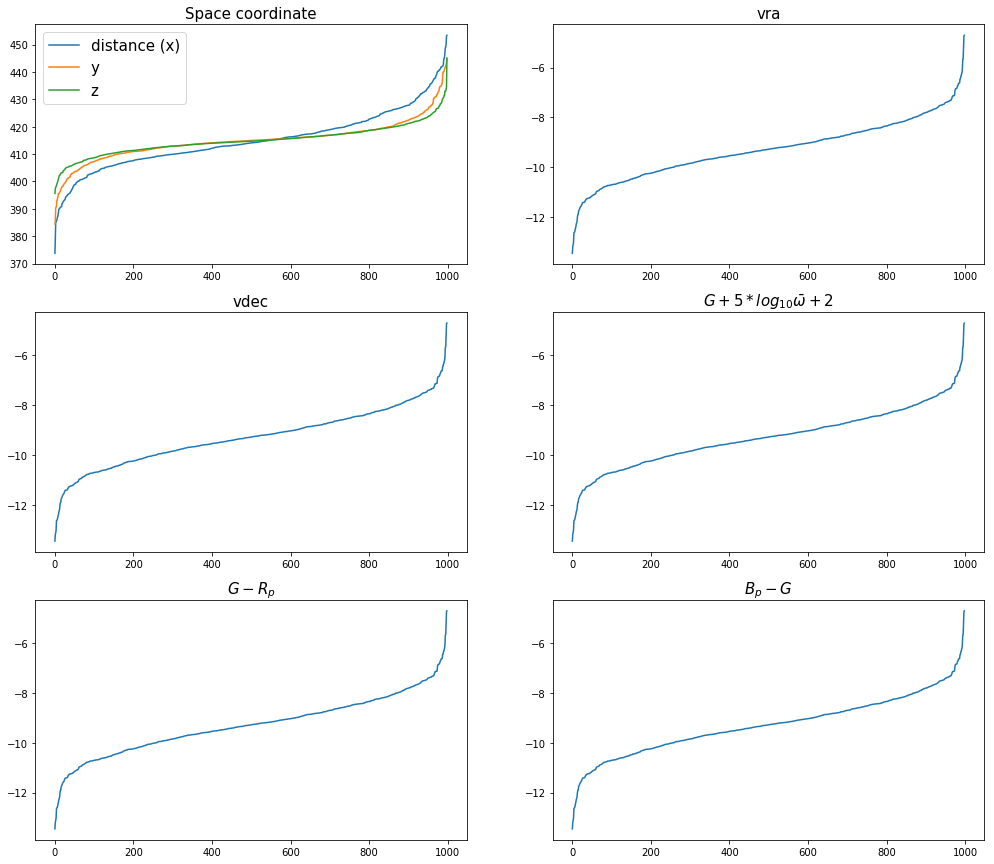

In [255]:
ilabel = ilabel_[0]
plt.figure(figsize=(17,15))
plt.subplot(321)
plt.title("Space coordinate", fontsize=15)
for i in range(3) :
    #plt.subplot(3,2,i+1)
    plt.plot(np.sort(source.dfcart[ilabel,i])-np.mean(source.dfcart[ilabel,i])+np.mean(source.dfcart[ilabel,0]), label=gu.data_name_cart[i])
    #plt.plot(np.zeros(len(np.sort(source.df[ilabel,3]))),c='r')
plt.legend(loc='best',fontsize=15)
for i in range(3,8) :
    plt.subplot(3,2,i-1)
    plt.title(gu.data_name_cart[i], fontsize=15)
    plt.plot(np.sort(source.df[ilabel,3]))
plt.show()

### ------------------------------------------------

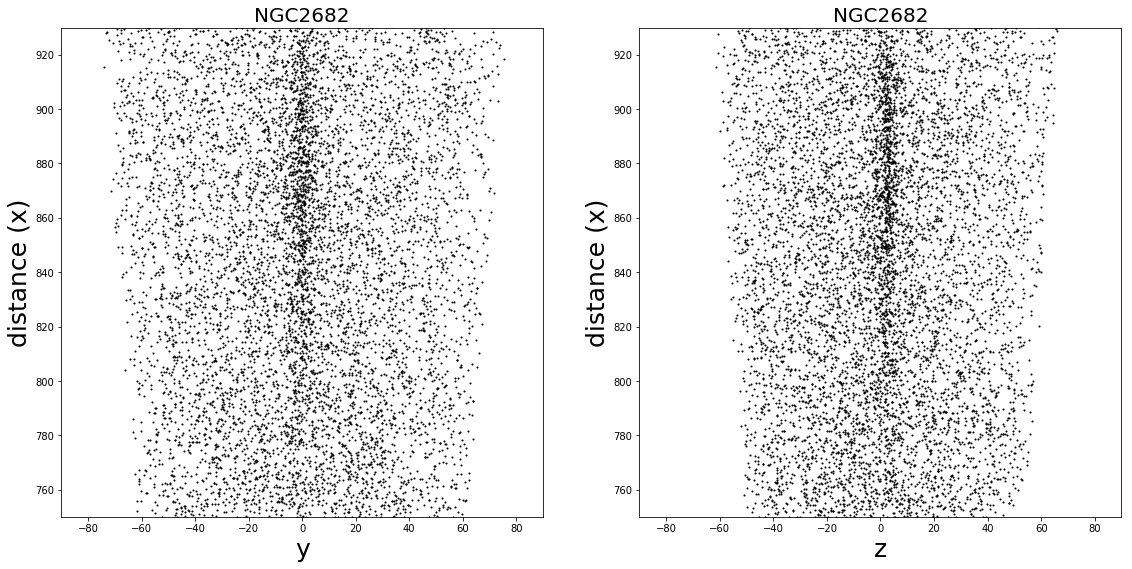

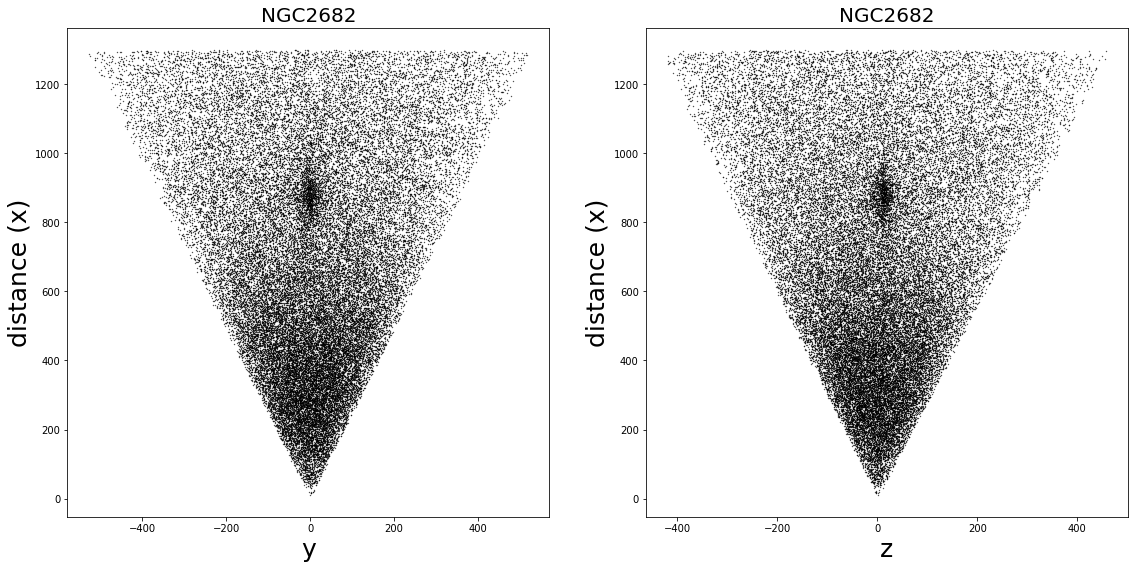

In [63]:
data = file_result[source.name]['data_cart']
#ilabel = ilabel_[0]
size = 1.1
center = 840

plt.figure(figsize=(19,9))                
for i_x, i_y, i in zip((1,2),(0,0),(1,2)) :
    plt.subplot(1,2,i)
    if i <= 2 : plt.title(source.name, fontsize=20)
    plt.scatter(source.dfcart[:,i_x],source.dfcart[:,i_y],s=size,c='k')
    #plt.scatter(data[:,i_x],data[:,i_y]/1.11260,s=size*30,c='r')
    plt.xlabel(gu.data_name_cart[i_x], fontsize=25)
    plt.ylabel(gu.data_name_cart[i_y], fontsize=25)
    plt.ylim(center-90,center+90)
    plt.xlim(-90,90)
    #plt.scatter(0,373,s=200,c='r')
plt.show()

plt.figure(figsize=(19,9))                
for i_x, i_y, i in zip((1,2),(0,0),(1,2)) :
    plt.subplot(1,2,i)
    if i <= 2 : plt.title(source.name, fontsize=20)
    plt.scatter(source.dfcart[:,i_x]*5,source.dfcart[:,i_y],s=0.1,c='k')
    #plt.scatter(data[:,i_x],data[:,i_y]/1.11260,s=size,c='w')
    plt.xlabel(gu.data_name_cart[i_x], fontsize=25)
    plt.ylabel(gu.data_name_cart[i_y], fontsize=25)
    #plt.ylim(center-60,center+60)
    #plt.xlim(-60,60)
    #plt.scatter(0,373,s=200,c='r')
plt.show()

In [64]:
print(source.radius,source.distmax)
print(np.tan(4*np.pi/180)*1300)

4.0 1300.0
90.90485552656354


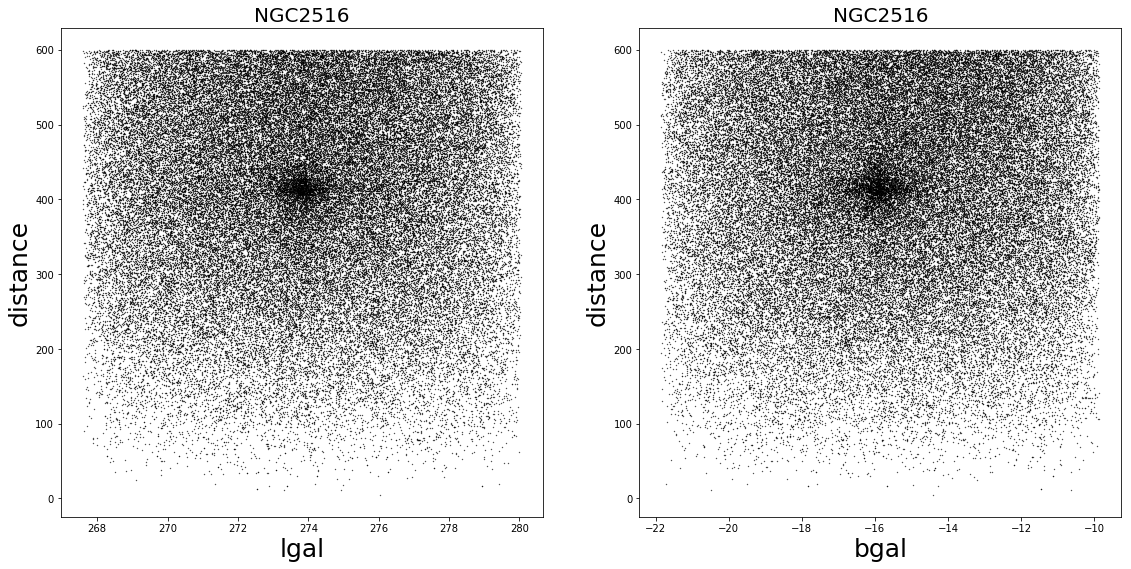

In [24]:
#ilabel = ilabel_[0]
size = 0.1

plt.figure(figsize=(19,9))                
for i_x, i_y, i in zip((1,2),(0,0),(1,2)) :
    plt.subplot(1,2,i)
    if i <= 2 : plt.title(source.name, fontsize=20)
    plt.scatter(source.df[:,i_x],source.df[:,i_y],s=size,c='k')
    #plt.scatter(source.dfcart[ilabel,i_x],source.dfcart[ilabel,i_y],s=size*300,c='r')
    plt.xlabel(gu.data_name[i_x], fontsize=25)
    plt.ylabel(gu.data_name[i_y], fontsize=25)
    #plt.ylim(350,470)
    #plt.xlim(-60,60)
plt.show()

In [ ]:
print()

In [98]:
print(len(source.dfcart[:,0]))
print(np.max(source.dfcart[ilabel,0]))
print(np.max(source.dfcart[ilabel,0])-np.min(source.dfcart[ilabel,0]))
(350,470)
(-60,60)

78782
450.9579452432776
86.2376641809492


(-60, 60)